In [23]:
import pandas as pd
import os

# Set working directory relative to the current script location (assuming script is in the same folder as 'logs.txt')
workingdir = os.path.dirname(os.path.abspath(__file__))
os.chdir(workingdir)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your results file
results_file = 'logs.txt'

try:
    df = pd.read_csv(results_file, delimiter=',', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(results_file, delimiter=',', encoding='ISO-8859-1')

# Inspect column names
print("Column names before renaming:", df.columns)

# Rename columns to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Replace the weird characters in the column names
df.columns = df.columns.str.replace('', '-')

# Inspect column names after renaming
print("Column names after renaming:", df.columns)

Column names before renaming: Index(['train_idx', ' lambda', ' iteration', ' accuracy_original',
       ' accuracy_generated', ' difference_accuracy', ' f1_original',
       ' f1_generated', ' difference_f1', ' demographic_parity_original',
       ' demographic_parity_generated', ' demographic_parity_diff',
       ' acc_orig_Male_<25', ' f1_orig_Male_<25', ' acc_gen_Male_<25',
       ' f1_gen_Male_<25', ' acc_orig_Female_<25', ' f1_orig_Female_<25',
       ' acc_gen_Female_<25', ' f1_gen_Female_<25', ' acc_orig_Male_2560',
       ' f1_orig_Male_2560', ' acc_gen_Male_2560', ' f1_gen_Male_2560',
       ' acc_orig_Female_2560', ' f1_orig_Female_2560',
       ' acc_gen_Female_2560', ' f1_gen_Female_2560', ' acc_orig_Male_>60',
       ' f1_orig_Male_>60', ' acc_gen_Male_>60', ' f1_gen_Male_>60',
       ' acc_orig_Female_>60', ' f1_orig_Female_>60', ' acc_gen_Female_>60',
       ' f1_gen_Female_>60', ' dp_orig_pair_0', ' dp_gen_pair_0',
       ' dp_orig_pair_1', ' dp_gen_pair_1', ' d

# Optimal top three points

In [25]:
import pandas as pd
import re
import numpy as np

# Read the log file
log_file_path = 'logs.txt'
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Function to parse the log data
def parse_log_data(log_data):
    data = []
    pattern = re.compile(r'^[0-9]')  # Matches lines starting with a number
    for line in log_data:
        if pattern.match(line.strip()):
            values = re.findall(r'[\d\.\-e]+', line)
            values = list(map(float, values))
            data.append(values)
    return data

# Parse the log data
parsed_data = parse_log_data(log_data)

# Convert the parsed data to a DataFrame
columns = [
    'train_idx', 'lambda', 'iteration', 'accuracy_original', 'accuracy_generated',
    'difference_accuracy', 'f1_original', 'f1_generated', 'difference_f1',
    'demographic_parity_original', 'demographic_parity_generated', 'demographic_parity_diff',
    'acc_orig_Male_<25', 'f1_orig_Male_<25', 'acc_gen_Male_<25', 'f1_gen_Male_<25',
    'acc_orig_Female_<25', 'f1_orig_Female_<25', 'acc_gen_Female_<25', 'f1_gen_Female_<25',
    'acc_orig_Male_25-60', 'f1_orig_Male_25-60', 'acc_gen_Male_25-60', 'f1_gen_Male_25-60',
    'acc_orig_Female_25-60', 'f1_orig_Female_25-60', 'acc_gen_Female_25-60', 'f1_gen_Female_25-60',
    'acc_orig_Male_>60', 'f1_orig_Male_>60', 'acc_gen_Male_>60', 'f1_gen_Male_>60',
    'acc_orig_Female_>60', 'f1_orig_Female_>60', 'acc_gen_Female_>60', 'f1_gen_Female_>60',
    'dp_orig_pair_0', 'dp_gen_pair_0', 'dp_orig_pair_1', 'dp_gen_pair_1',
    'dp_orig_pair_2', 'dp_gen_pair_2'
]
df = pd.DataFrame(parsed_data, columns=columns)

# Clean column names
df.columns = df.columns.str.strip()

# Aggregate the results by lambda
df['lambda'] = df['lambda'].astype(float)  # Convert lambda to float
aggregated_results = df.groupby('lambda').agg({
    'accuracy_generated': ['mean', 'std'],
    'f1_generated': ['mean', 'std'],
    'demographic_parity_generated': ['mean', 'std'],
    'difference_f1': 'mean',
    'difference_accuracy': 'mean',
    'demographic_parity_diff': 'mean'
}).reset_index()

# Flatten the MultiIndex columns
aggregated_results.columns = ['lambda', 'avg_accuracy_generated', 'std_accuracy_generated', 
                              'avg_f1_generated', 'std_f1_generated', 
                              'avg_dp_generated', 'std_dp_generated',
                              'avg_difference_f1', 'avg_difference_accuracy', 'avg_difference_dp']

# Calculate the absolute value of DP difference
aggregated_results['abs_difference_dp'] = aggregated_results['avg_difference_dp'].abs()

# Create a custom score where we want abs_difference_dp to be highest and others to be lowest
aggregated_results['custom_score'] = aggregated_results['abs_difference_dp'] - aggregated_results['avg_difference_f1'] - aggregated_results['avg_difference_accuracy']

# Sort based on the custom score
sorted_df = aggregated_results.sort_values(by='custom_score', ascending=False)

# Get the top 3 points
top_3_points = sorted_df.head(3)

# Output the top 3 points
print("\nTop 3 Points with Highest Absolute DP Difference, Lowest F1 Difference, and Lowest Accuracy Difference:")
print(top_3_points)



Top 3 Points with Highest Absolute DP Difference, Lowest F1 Difference, and Lowest Accuracy Difference:
    lambda  avg_accuracy_generated  std_accuracy_generated  avg_f1_generated  \
3      0.3                0.738651                0.064714          0.452468   
15     1.5                0.739868                0.037968          0.431652   
1      0.1                0.749364                0.027261          0.441794   

    std_f1_generated  avg_dp_generated  std_dp_generated  avg_difference_f1  \
3           0.087135          0.009950          0.023040           0.200565   
15          0.073488          0.006438          0.034972           0.220741   
1           0.080357          0.024769          0.030899           0.211499   

    avg_difference_accuracy  avg_difference_dp  abs_difference_dp  \
3                  0.095755           0.141456           0.141456   
15                 0.094273           0.144968           0.144968   
1                  0.085340           0.126637    

Column names after renaming: Index(['train_idx', 'lambda', 'iteration', 'accuracy_original',
       'accuracy_generated', 'difference_accuracy', 'f1_original',
       'f1_generated', 'difference_f1', 'demographic_parity_original',
       'demographic_parity_generated', 'demographic_parity_diff',
       'acc_orig_Male_<25', 'f1_orig_Male_<25', 'acc_gen_Male_<25',
       'f1_gen_Male_<25', 'acc_orig_Female_<25', 'f1_orig_Female_<25',
       'acc_gen_Female_<25', 'f1_gen_Female_<25', 'acc_orig_Male_25-60',
       'f1_orig_Male_25-60', 'acc_gen_Male_25-60', 'f1_gen_Male_25-60',
       'acc_orig_Female_25-60', 'f1_orig_Female_25-60', 'acc_gen_Female_25-60',
       'f1_gen_Female_25-60', 'acc_orig_Male_>60', 'f1_orig_Male_>60',
       'acc_gen_Male_>60', 'f1_gen_Male_>60', 'acc_orig_Female_>60',
       'f1_orig_Female_>60', 'acc_gen_Female_>60', 'f1_gen_Female_>60',
       'dp_orig_pair_0', 'dp_gen_pair_0', 'dp_orig_pair_1', 'dp_gen_pair_1',
       'dp_orig_pair_2', 'dp_gen_pair_2'],
      d

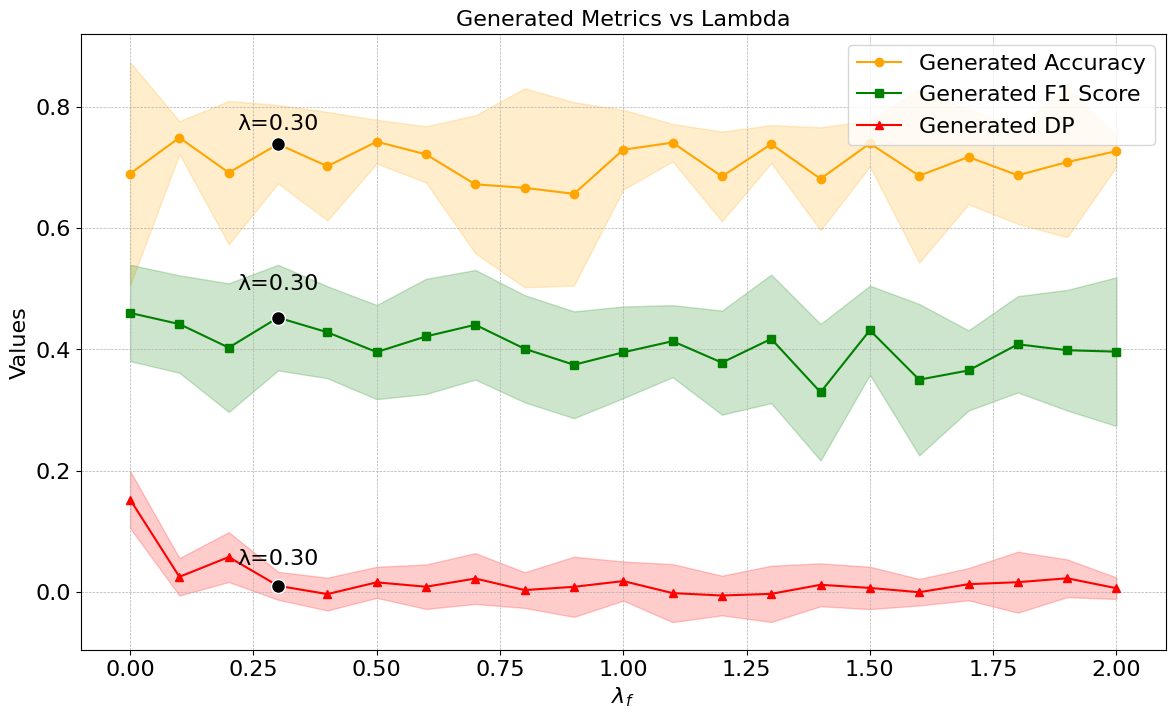

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the log file
log_file_path = 'logs.txt'
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Function to parse the log data
def parse_log_data(log_data):
    data = []
    pattern = re.compile(r'^[0-9]')
    for line in log_data:
        if pattern.match(line.strip()):
            values = re.findall(r'[\d\.\-e]+', line.replace(',', '.'))
            # Clean up trailing dots
            values = [v.rstrip('.') for v in values]
            values = list(map(float, values))
            data.append(values)
    return data

# Parse the log data
parsed_data = parse_log_data(log_data)

# Convert the parsed data to a DataFrame
columns = [
    'train_idx', 'lambda', 'iteration', 'accuracy_original', 'accuracy_generated',
    'difference_accuracy', 'f1_original', 'f1_generated', 'difference_f1',
    'demographic_parity_original', 'demographic_parity_generated', 'demographic_parity_diff',
    'acc_orig_Male_<25', 'f1_orig_Male_<25', 'acc_gen_Male_<25', 'f1_gen_Male_<25',
    'acc_orig_Female_<25', 'f1_orig_Female_<25', 'acc_gen_Female_<25', 'f1_gen_Female_<25',
    'acc_orig_Male_25-60', 'f1_orig_Male_25-60', 'acc_gen_Male_25-60', 'f1_gen_Male_25-60',
    'acc_orig_Female_25-60', 'f1_orig_Female_25-60', 'acc_gen_Female_25-60', 'f1_gen_Female_25-60',
    'acc_orig_Male_>60', 'f1_orig_Male_>60', 'acc_gen_Male_>60', 'f1_gen_Male_>60',
    'acc_orig_Female_>60', 'f1_orig_Female_>60', 'acc_gen_Female_>60', 'f1_gen_Female_>60',
    'dp_orig_pair_0', 'dp_gen_pair_0', 'dp_orig_pair_1', 'dp_gen_pair_1',
    'dp_orig_pair_2', 'dp_gen_pair_2'
]
df = pd.DataFrame(parsed_data, columns=columns)

# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('', '-')

# Print column names to verify
print("Column names after renaming:", df.columns)

# Aggregate the results by lambda
df['lambda'] = df['lambda'].astype(float)  # Convert lambda to float if necessary
aggregated_results = df.groupby('lambda').agg({
    'accuracy_generated': ['mean', 'std'],
    'f1_generated': ['mean', 'std'],
    'demographic_parity_generated': ['mean', 'std']
}).reset_index()

# Flatten the MultiIndex columns
aggregated_results.columns = ['lambda', 'avg_accuracy_generated', 'std_accuracy_generated', 
                              'avg_f1_generated', 'std_f1_generated', 
                              'avg_dp_generated', 'std_dp_generated']

# Print the aggregated results
print(aggregated_results)

# Find the specific point where lambda is approximately 0.3
lambda_value = 0.3
highlight_point = aggregated_results[np.isclose(aggregated_results['lambda'], lambda_value, atol=1e-5)]

# Check if the highlight point is found
if highlight_point.empty:
    raise ValueError(f"No data point found for lambda value approximately {lambda_value}")

highlight_point = highlight_point.iloc[0]

# Plot the metrics with standard deviations
plt.figure(figsize=(14, 8))

# Plot generated accuracy
plt.plot(aggregated_results['lambda'], aggregated_results['avg_accuracy_generated'], label='Generated Accuracy', color='orange', marker='o')
plt.fill_between(aggregated_results['lambda'], 
                 aggregated_results['avg_accuracy_generated'] - aggregated_results['std_accuracy_generated'], 
                 aggregated_results['avg_accuracy_generated'] + aggregated_results['std_accuracy_generated'], 
                 color='orange', alpha=0.2)

# Plot generated F1 score
plt.plot(aggregated_results['lambda'], aggregated_results['avg_f1_generated'], label='Generated F1 Score', color='green', marker='s')
plt.fill_between(aggregated_results['lambda'], 
                 aggregated_results['avg_f1_generated'] - aggregated_results['std_f1_generated'], 
                 aggregated_results['avg_f1_generated'] + aggregated_results['std_f1_generated'], 
                 color='green', alpha=0.2)

# Plot generated DP
plt.plot(aggregated_results['lambda'], aggregated_results['avg_dp_generated'], label='Generated DP', color='red', marker='^')
plt.fill_between(aggregated_results['lambda'], 
                 aggregated_results['avg_dp_generated'] - aggregated_results['std_dp_generated'], 
                 aggregated_results['avg_dp_generated'] + aggregated_results['std_dp_generated'], 
                 color='red', alpha=0.2)

# Highlight the specific point
plt.scatter(highlight_point['lambda'], highlight_point['avg_accuracy_generated'], color='black', s=100, edgecolor='white', zorder=5)
plt.scatter(highlight_point['lambda'], highlight_point['avg_f1_generated'], color='black', s=100, edgecolor='white', zorder=5)
plt.scatter(highlight_point['lambda'], highlight_point['avg_dp_generated'], color='black', s=100, edgecolor='white', zorder=5)

# Annotate the specific point
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_accuracy_generated']),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_f1_generated']),
             textcoords="offset points", xytext=(0,20), ha='center', fontsize=16)
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_dp_generated']),
             textcoords="offset points", xytext=(0,15), ha='center', fontsize=16)

plt.xlabel(r'$\lambda_f$', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.title('Generated Metrics vs Lambda', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save the plot as a high-resolution image
plt.savefig('Generated_Metrics_vs_Lambda.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Subgroups

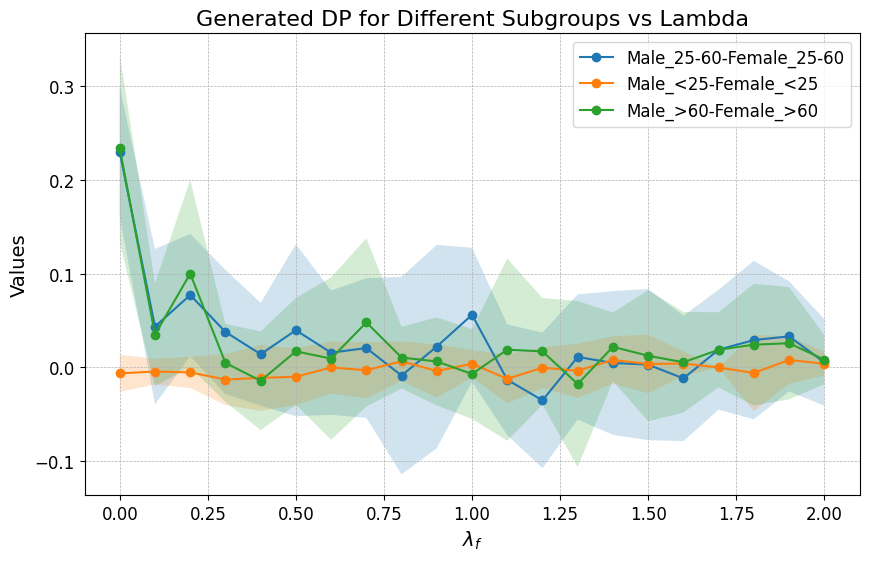

In [9]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the log file
log_file_path = 'final-ctgan-300-no-condition.txt'
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Function to parse the log data
def parse_log_data(log_data):
    data = []
    pattern = re.compile(r'^[0-9]')
    for line in log_data:
        if pattern.match(line.strip()):
            values = re.findall(r'[\d\.\-e]+', line.replace(',', '.'))
            # Clean up trailing dots
            values = [v.rstrip('.') for v in values]
            values = list(map(float, values))
            data.append(values)
    return data

# Parse the log data
parsed_data = parse_log_data(log_data)

# Subgroup mapping
subgroup_mapping = {
    'dp_gen_pair_0': 'Male_25-60-Female_25-60',
    'dp_gen_pair_1': 'Male_<25-Female_<25',
    'dp_gen_pair_2': 'Male_>60-Female_>60'
}

# Convert the parsed data to a DataFrame
columns = [
    'train_idx', 'lambda', 'iteration', 'accuracy_original',
    'accuracy_generated', 'difference_accuracy', 'f1_original',
    'f1_generated', 'difference_f1', 'demographic_parity_original',
    'demographic_parity_generated', 'demographic_parity_diff',
    'acc_orig_Male_<25', 'f1_orig_Male_<25', 'acc_gen_Male_<25',
    'f1_gen_Male_<25', 'acc_orig_Female_<25', 'f1_orig_Female_<25',
    'acc_gen_Female_<25', 'f1_gen_Female_<25', 'acc_orig_Male_25-60',
    'f1_orig_Male_25-60', 'acc_gen_Male_25-60', 'f1_gen_Male_25-60',
    'acc_orig_Female_25-60', 'f1_orig_Female_25-60', 'acc_gen_Female_25-60',
    'f1_gen_Female_25-60', 'acc_orig_Male_>60', 'f1_orig_Male_>60',
    'acc_gen_Male_>60', 'f1_gen_Male_>60', 'acc_orig_Female_>60',
    'f1_orig_Female_>60', 'acc_gen_Female_>60', 'f1_gen_Female_>60',
    'dp_orig_pair_0', 'dp_gen_pair_0', 'dp_orig_pair_1', 'dp_gen_pair_1',
    'dp_orig_pair_2', 'dp_gen_pair_2'
]
df = pd.DataFrame(parsed_data, columns=columns)

# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('', '-')

# Filter the lambda values between 0 and 1
df['lambda'] = df['lambda'].astype(float)  # Convert lambda to float if necessary
filtered_df = df[(df['lambda'] >= 0) & (df['lambda'] <= 2.05)]

# Aggregate the results by lambda for each DP pair
dp_pairs = ['dp_gen_pair_0', 'dp_gen_pair_1', 'dp_gen_pair_2']
aggregated_results = []
for dp_pair in dp_pairs:
    agg_df = filtered_df.groupby('lambda').agg({
        dp_pair: ['mean', 'std']
    }).reset_index()
    agg_df.columns = ['lambda', 'avg_dp', 'std_dp']
    agg_df['subgroup'] = dp_pair
    aggregated_results.append(agg_df)

# Combine the aggregated results into a single DataFrame
aggregated_results = pd.concat(aggregated_results, ignore_index=True)

# Plotting DP for the three subgroups
plt.figure(figsize=(10, 6))
for subgroup in dp_pairs:
    subgroup_data = aggregated_results[aggregated_results['subgroup'] == subgroup]
    plt.plot(subgroup_data['lambda'], subgroup_data['avg_dp'], label=subgroup_mapping[subgroup], marker='o')
    plt.fill_between(subgroup_data['lambda'], 
                     subgroup_data['avg_dp'] - subgroup_data['std_dp'], 
                     subgroup_data['avg_dp'] + subgroup_data['std_dp'], 
                     alpha=0.2)

plt.xlabel(r'$\lambda_f$', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Generated DP for Different Subgroups vs Lambda', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as a high-resolution image
plt.savefig('DP_vs_Lambda.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
